#==========
# calculate the dissociation curve of H2 with sto3g basis 
#==========

In [1]:
import numpy as np
from pyscf import gto,scf,fci,cc,mp
mol = gto.Mole()
natoms = 2
distance = np.linspace(0.1, 6.0, 60)
n = len(distance)
energy_RHF = np.zeros(n)
energy_UHF = np.zeros(n)
energy_FCI = np.zeros(n)
energy_CCSD = np.zeros(n)
energy_UCCSD = np.zeros(n)
energy_MP2 = np.zeros(n)


In [2]:
# RHF MP2 CCSD

for i,R in enumerate(distance):
    mol.atom = [['H',(0.0, 0.0, 0.0)],['H',(0.0, 0.0, R)]]
    mol.basis = 'sto3g' #cc-pvdz' #6-31g'#sto-3g'#cc-pvdz' #'dzp' #6-31g'#sto-3g' #6-31g'
    mol.build()

    molRHF = scf.RHF(mol) 
    energy_RHF[i] = molRHF.kernel()
  
    molFCI = fci.FCI(mol, molRHF.mo_coeff)
    energy_FCI[i] = molFCI.kernel()[0]
    
    molMP2 = mp.MP2(molRHF)
    energy_MP2[i] = molMP2.kernel()[0] + energy_RHF[i]
    
    try:
        molCCSD = cc.CCSD(molRHF)
        molCCSD.level_shift = 0.1
        energy_CCSD[i] = molCCSD.kernel()[0] + energy_RHF[i]
    except:
        energy_CCSD[i] = 0
        

converged SCF energy = 2.71588739329275
E(MP2) = 2.7112596072183  E_corr = -0.00462778607445201
E(CCSD) = 2.709960768723005  E_corr = -0.005926624569747669
converged SCF energy = 0.164175012061696
E(MP2) = 0.159042666999321  E_corr = -0.00513234506237522
E(CCSD) = 0.1574821308256759  E_corr = -0.006692881236020369
converged SCF energy = -0.593827758535727
E(MP2) = -0.599781928258034  E_corr = -0.00595416972230741
E(CCSD) = -0.6018037201071912  E_corr = -0.00797596157146461
converged SCF energy = -0.904361394163539
E(MP2) = -0.911436819061318  E_corr = -0.00707542489777959
E(CCSD) = -0.9141497287603115  E_corr = -0.009788334596772665
converged SCF energy = -1.04299627454009
E(MP2) = -1.05148606962497  E_corr = -0.00848979508487271
E(CCSD) = -1.055159830943847  E_corr = -0.01216355640375236
converged SCF energy = -1.1011282422677
E(MP2) = -1.11133213930319  E_corr = -0.0102038970354918
E(CCSD) = -1.116286097040637  E_corr = -0.0151578547729352
converged SCF energy = -1.11734903499028
E(M

converged SCF energy = -0.595890465206822
E(MP2) = -1.16529142440379  E_corr = -0.569400959196969
E(CCSD) = -0.9331637123377833  E_corr = -0.337273247130961
converged SCF energy = -0.594939095573377
E(MP2) = -1.17841530492325  E_corr = -0.583476209349873
E(CCSD) = -0.9331637039586465  E_corr = -0.3382246083852691
converged SCF energy = -0.594027723649449
E(MP2) = -1.191561194345  E_corr = -0.597533470695551
E(CCSD) = -0.9331630011604302  E_corr = -0.3391352775109815
converged SCF energy = -0.593153126489897
E(MP2) = -1.20473003098487  E_corr = -0.61157690449497
E(CCSD) = -0.9331636949837226  E_corr = -0.340010568493826
converged SCF energy = -0.592312501742435
E(MP2) = -1.21792254420258  E_corr = -0.625610042460144
E(CCSD) = -0.9331637343055702  E_corr = -0.3408512325631351
converged SCF energy = -0.591503400989119
E(MP2) = -1.23113924814074  E_corr = -0.639635847151622

WARN:  diis singular, eigh(h) [-1.73616015e+00 -4.28739270e-13  1.49806545e-11  1.73615149e+00
  1.13827914e+05]

co

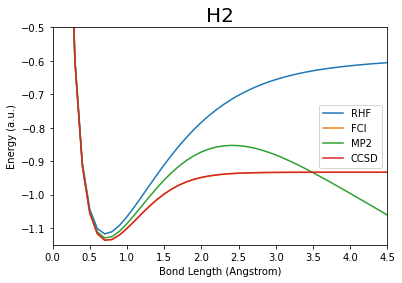

In [3]:
# plt RHF MP2 CCSD FCI

import matplotlib.pyplot as plt
plt.title("H2", fontsize=20)
plt.xlabel("Bond Length (Angstrom)")
plt.ylabel("Energy (a.u.)")
plt.plot(distance, energy_RHF, label = 'RHF')
plt.plot(distance, energy_FCI, label = 'FCI')
plt.plot(distance, energy_MP2, label = 'MP2')
plt.plot(distance, energy_CCSD, label = 'CCSD')
plt.legend()
plt.ylim(-1.15,-0.5)
plt.xlim(0.0,4.5)
plt.show()

In [3]:
# remove the noise of UCCSD

for i,R in enumerate(distance):
    mol.atom = [['H',(0.0, 0.0, 0.0)],['H',(0.0, 0.0, R)]]
    mol.basis = 'sto3g' #cc-pvdz' #6-31g'#sto-3g'#cc-pvdz' #'dzp' #6-31g'#sto-3g' #6-31g'
    mol.build()
    
    print(mol.spheric_labels())
    nb = mol.nao_nr()
    dm = np.zeros((2,nb,nb)) 
    dm[1,0,0] = 1
    dm[0,1,1] = 1
    molUHF = scf.UHF(mol)
    energy_UHF[i] = molUHF.kernel(dm0=dm, max_cycle=500)
    assert molUHF.converged == True
    
    molUCCSD = cc.UCCSD(molUHF)
#    molUCCSD.conv_tol = 1e-6
#    molUCCSD.max_cycle = 1000
#    molUCCSD.diis_space = 10
    if i==0:
        e,t1,t2 = molUCCSD.kernel()
    else:
        e,t1,t2 = molUCCSD.kernel(t1,t2)
    energy_UCCSD[i] = e + energy_UHF[i]
    print("R=",R)
#    assert molUCCSD.converged == True
    

['0 H 1s    ', '1 H 1s    ']
converged SCF energy = 2.71588739329277  <S^2> = 2.5313085e-14  2S+1 = 1
E(UCCSD) = 2.709960769299897  E_corr = -0.005926623992877121
R= 0.1
['0 H 1s    ', '1 H 1s    ']
converged SCF energy = 0.164175012064811  <S^2> = 4.1033843e-12  2S+1 = 1
E(UCCSD) = 0.1574821342145693  E_corr = -0.006692877850241375
R= 0.2
['0 H 1s    ', '1 H 1s    ']
converged SCF energy = -0.593827758502517  <S^2> = 5.2337024e-11  2S+1 = 1
E(UCCSD) = -0.6018037130576838  E_corr = -0.007975954555167034
R= 0.30000000000000004
['0 H 1s    ', '1 H 1s    ']
converged SCF energy = -0.904361394005145  <S^2> = 3.0973468e-10  2S+1 = 1
E(UCCSD) = -0.9141497111581665  E_corr = -0.009788317153021779
R= 0.4
['0 H 1s    ', '1 H 1s    ']
converged SCF energy = -1.04299627454009  <S^2> = 4.4408921e-16  2S+1 = 1
E(UCCSD) = -1.055159758688355  E_corr = -0.01216348414825956
R= 0.5
['0 H 1s    ', '1 H 1s    ']
converged SCF energy = -1.1011282422677  <S^2> = 0  2S+1 = 1
E(UCCSD) = -1.116286041174205  E_

E(UCCSD) = -0.9331644657000742  E_corr = -5.045442549755327e-07
R= 4.5
['0 H 1s    ', '1 H 1s    ']
converged SCF energy = -0.933163863288109  <S^2> = 0.99999889  2S+1 = 2.236067
E(UCCSD) = -0.9331641722190067  E_corr = -3.089308979091967e-07
R= 4.6
['0 H 1s    ', '1 H 1s    ']
converged SCF energy = -0.933163800999557  <S^2> = 0.99999934  2S+1 = 2.2360674
E(UCCSD) = -0.9331639885010754  E_corr = -1.875015186274403e-07
R= 4.7
['0 H 1s    ', '1 H 1s    ']
converged SCF energy = -0.933163761714536  <S^2> = 0.9999996  2S+1 = 2.2360676
E(UCCSD) = -0.9331638744659048  E_corr = -1.127513685368701e-07
R= 4.8
['0 H 1s    ', '1 H 1s    ']
converged SCF energy = -0.933163737175953  <S^2> = 0.99999977  2S+1 = 2.2360678
E(UCCSD) = -0.9331638043208749  E_corr = -6.714492178564373e-08
R= 4.9
['0 H 1s    ', '1 H 1s    ']
converged SCF energy = -0.933163722005021  <S^2> = 0.99999986  2S+1 = 2.2360679
E(UCCSD) = -0.9331637615858208  E_corr = -3.958079974811506e-08
R= 5.0
['0 H 1s    ', '1 H 1s    ']
co

(0.0, 4.5)

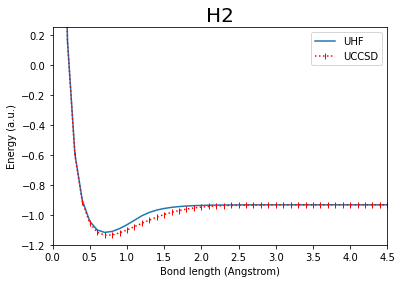

In [5]:
# plot UHF UCCSD

import matplotlib.pyplot as plt
plt.title("H2", fontsize=20)
plt.xlabel("Bond length (Angstrom)")
plt.ylabel("Energy (a.u.)")
plt.plot(distance, energy_UHF, label = 'UHF')
plt.plot(distance, energy_UCCSD, 'r|:',label = 'UCCSD')
plt.legend()
plt.ylim(-1.2,0.25)
plt.xlim(0.0,4.5)

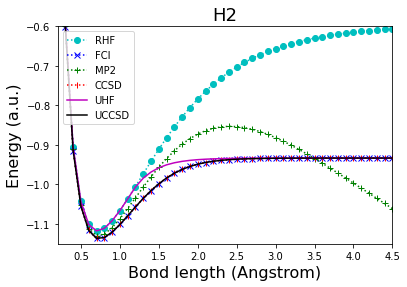

In [6]:
# print(energy_CCSD)
import matplotlib.pyplot as plt
plt.title("H2", fontsize=18)
plt.xlabel("Bond length (Angstrom)", fontsize=16)
plt.ylabel("Energy (a.u.)", fontsize=16)
plt.plot(distance, energy_RHF, 'co:', label = 'RHF')
plt.plot(distance, energy_FCI,'bx:', label = 'FCI')
plt.plot(distance, energy_MP2, 'g+:', label = 'MP2')
plt.plot(distance, energy_CCSD, 'r|:',label = 'CCSD')
plt.plot(distance, energy_UHF, 'm-', label = 'UHF')
plt.plot(distance, energy_UCCSD, 'k-',label = 'UCCSD')
plt.legend(loc = 2)
plt.ylim(-1.15,-0.60)
plt.xlim(0.2, 4.5)
plt.savefig('./H2_sto3g.tiff', dpi=300)
plt.show()

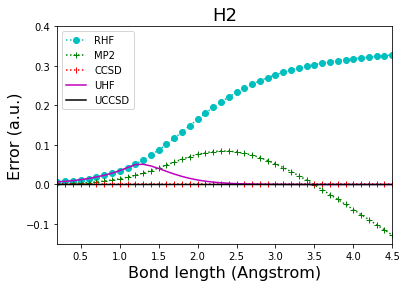

In [4]:
# print(energy_CCSD)
import matplotlib.pyplot as plt
plt.title("H2", fontsize=18)
plt.xlabel("Bond length (Angstrom)", fontsize=16)
plt.ylabel("Error (a.u.)", fontsize=16)
plt.plot(distance, energy_RHF - energy_FCI, 'co:', label = 'RHF')
#plt.plot(distance, energy_FCI - energy_FCI,'bx:', label = 'FCI')
plt.plot(distance, energy_MP2 - energy_FCI, 'g+:', label = 'MP2')
plt.plot(distance, energy_CCSD - energy_FCI, 'r|:',label = 'CCSD')
plt.plot(distance, energy_UHF - energy_FCI, 'm-', label = 'UHF')
plt.plot(distance, energy_UCCSD - energy_FCI, 'k-',label = 'UCCSD')
plt.legend(loc = 2)
plt.ylim(-0.15,0.40)
plt.xlim(0.2, 4.5)
plt.savefig('./H2_diff_sto3g.tiff', dpi=300)
plt.show()